<a href="https://colab.research.google.com/github/bryanf10/prueba/blob/main/Laboratorio_Actividad_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Laboratorio: Regresión lineal y árboles de decisión para tareas de regresión


## Objetivos

Mediante esta actividad se pretende que ponga en práctica los pasos para la resolución de un problema de machine learning, el tratamiento de datos y la creación de modelos basados en regresión lineal y árboles de decisión. El objetivo es comprender de forma práctica con un problema determinado las diferencias que existen a la hora de entrenar los diferentes modelos.

- Iniciarse en el Análisis Exploratorio de Datos (EDA) para los problemas de Machine Learning.
- Entender y aplicar los conceptos de la Regresión Lineal Múltiple a un problema de regresión.
- Entender y aplicar los conceptos de Árboles de Decisión a un problema de regresión.
- Evaluar y analizar los resultados de los clasificadores.
- Investigar la aplicación de los modelos de clasificación a problemas reales.


## Descripción de la actividad

Debes completar los espacios indicados en el notebook con el código solicitado y la respuesta, en función de lo que se solicite. Ten encuenta que las celdas vacías indican cuántas líneas debe ocupar la respuesta, por lo general no más de una línea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive-beta.ics.uci.edu/dataset/360/air+quality

Se trata de un dataset con un conjunto de datos sobre calidad del aire. El conjunto de datos contiene 9358 instancias de respuestas promediadas por hora de una matriz de 5 sensores químicos de óxido de metal integrados en un dispositivo multisensor químico de calidad del aire. El dispositivo estaba ubicado en un área significativamente contaminada, al nivel de la carretera, dentro de una ciudad italiana. Los datos se registraron desde marzo de 2004 hasta febrero de 2005 (un año).

El objetivo de la regresión será predecir la calidad del aire para un determinado día.

### Tareas que se deben realizar

- Análisis descriptivo de los datos:
   - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Regresión:
  - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Investigación:
  - Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para el artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la regresión.
    - Cómo utilizan las técnicas de regresión, si realizan alguna adaptación de los algoritmos indicarse.
    - Principales resultados de la aplicación y de la investigación.


### Análisis descriptivo de los datos
A continuación vas a encontrar una serie de preguntas que tendrás que responder. Para responder tendrás que escribir (y ejecutar) una (o más de una) línea de código, y a continuación indicar la respuesta en la celda indicada.

In [ ]:
## cargar el dataset

In [ ]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
filename = "/content/drive/MyDrive/Colab Notebooks/Tecnicas de inteligencia artificial/AirQualityUCI.csv"

data = pd.read_csv(
filename,
delimiter=';',
#nrows=lines_number,
quoting=csv.QUOTE_NONE,
on_bad_lines='skip',
encoding_errors='ignore'
)


In [ ]:
## ¿cuántas instancias tiene el dataset?
#print(data)
print("Número de instancias en el dataset:", data.shape[0])


Número de instancias en el dataset: 9471


_indica aquí tu respuesta_
<hr>
Respuesta en el terminal:

  [9471 rows x 17 columns]
El dataset contiene contiene 9471 instancias.


In [ ]:
## ¿cuál es el tipo de datos de cada una de las columnas?
print(data.dtypes)

Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object


_indica aquí tu respuesta_
<hr>
El data set esta compuesto por numero de punto flotante y de tipo objeto.


Respuesta en el terminal:

Date       =       object \
Time        =      object \
CO(GT)      =      object\
PT08.S1(CO)  =    float64\
NMHC(GT)    =     float64\
C6H6(GT)    =      object\
PT08.S2(NMHC)=    float64\
NOx(GT)      =    float64\
PT08.S3(NOx)  =   float64\
NO2(GT)       =   float64\
PT08.S4(NO2)  =   float64\
PT08.S5(O3)   =   float64\
T             =    object\
RH            =    object\
AH            =    object\
Unnamed: 15  =    float64\
Unnamed: 16  =    float64\
dtype: object

In [ ]:
## ¿cuántas columnas categóricas hay? ¿y cuántas continuas?
print("Número de columnas categóricas:",len(data.select_dtypes(include=object).columns))
print("Número de columnas continuas:", len( data.select_dtypes(include=float).columns))


Número de columnas categóricas: 7
Número de columnas continuas: 10


_indica aquí tu respuesta_

---
Respuesta en terminal:\
Número de columnas categóricas: 7\
Número de columnas continuas: 10


In [ ]:
## ¿existen valores nulos en el dataset?
print("Este es el recuento de valores nulos\n",data.isnull().sum())
print("Si hay datos nulos",data.isnull().any().any())

Este es el recuento de valores nulos
 Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64
Si hay datos nulos True


_indica aquí tu respuesta_
Si hay datos nulos en todas las columnas.Exactamente 114 por cada columna.


In [ ]:
## ¿cuál es la variable respuesta?¿de qué tipo es?

#print(data)

            Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  \
0     10/03/2004  18.00.00    2,6       1360.0     150.0     11,9   
1     10/03/2004  19.00.00      2       1292.0     112.0      9,4   
2     10/03/2004  20.00.00    2,2       1402.0      88.0      9,0   
3     10/03/2004  21.00.00    2,2       1376.0      80.0      9,2   
4     10/03/2004  22.00.00    1,6       1272.0      51.0      6,5   
...          ...       ...    ...          ...       ...      ...   
9466         NaN       NaN    NaN          NaN       NaN      NaN   
9467         NaN       NaN    NaN          NaN       NaN      NaN   
9468         NaN       NaN    NaN          NaN       NaN      NaN   
9469         NaN       NaN    NaN          NaN       NaN      NaN   
9470         NaN       NaN    NaN          NaN       NaN      NaN   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0     

_indica aquí tu respuesta_
<HR>

La variable respuesta está sujeta a interpretación, y la que he elegido es el CO(GT), es decir, la concentración de monóxido de carbono en el aire, la cual es de tipo float.

In [ ]:
# Limpiar las columnas que contienen comas en lugar de puntos decimales y convertirlas a tipo float

columnas_con_comas = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']

# Reemplazar las comas por puntos decimales y convertir a tipo float
for columna in columnas_con_comas:
    data[columna] = data[columna].str.replace(',', '.').astype(float)


_indica aquí tu respuesta_
<HR>

Se aplicó el método str.replace en las columnas 'CO(GT)', 'C6H6(GT)', 'T', 'RH' y 'AH', sustituyendo las comas por puntos, con el fin de convertirlas en variables de tipo float.

In [ ]:
print(data.describe())

            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683     894.595276   
std      77.657170   329.832710   139.789093    41.380206     342.333252   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000     711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.616971    794.990168    58.148873   1391.479641   975.072032   
std     257.433866    321.993552   126.940455    467.210125   456.938184   
min    -200

In [ ]:
## Si te fijas en los estadísticos del dataset, ¿cómo es la distribución de las variables, CO, NOx y NO2?



print("Estadísticas para CO(GT):")
print(data['CO(GT)'].describe())
print("\nEstadísticas para NOx(GT):")
print(data['NOx(GT)'].describe())
print("\nEstadísticas para NO2(GT):")
print(data['NO2(GT)'].describe())


Estadísticas  para CO(GT):
count    9357.000000
mean      -34.207524
std        77.657170
min      -200.000000
25%         0.600000
50%         1.500000
75%         2.600000
max        11.900000
Name: CO(GT), dtype: float64

Estadísticas  para NOx(GT):
count    9357.000000
mean      168.616971
std       257.433866
min      -200.000000
25%        50.000000
50%       141.000000
75%       284.000000
max      1479.000000
Name: NOx(GT), dtype: float64

Estadísticas  para NO2(GT):
count    9357.000000
mean       58.148873
std       126.940455
min      -200.000000
25%        53.000000
50%        96.000000
75%       133.000000
max       340.000000
Name: NO2(GT), dtype: float64


_indica aquí tu respuesta_
<HR>
Inicialmente, sin realizar ningún cambio en el conjunto de datos, se pueden observar numerosos datos anómalos, como valores negativos que carecen de sentido en este contexto.


In [ ]:
data_limpiada = data[(data['CO(GT)'] >= 0) & (data['NOx(GT)'] >= 0) & (data['NO2(GT)'] >= 0)]

print(data_limpiada)

            Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1     10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2     10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3     10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4     10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   
...          ...       ...     ...          ...       ...       ...   
9352  04/04/2005  10.00.00     3.1       1314.0    -200.0      13.5   
9353  04/04/2005  11.00.00     2.4       1163.0    -200.0      11.4   
9354  04/04/2005  12.00.00     2.4       1142.0    -200.0      12.4   
9355  04/04/2005  13.00.00     2.1       1003.0    -200.0       9.5   
9356  04/04/2005  14.00.00     2.2       1071.0    -200.0      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1        

In [ ]:
#¿Estas variables muestran alguna distribución especial?¿Tienen datos faltantes?¿y datos anómalos?



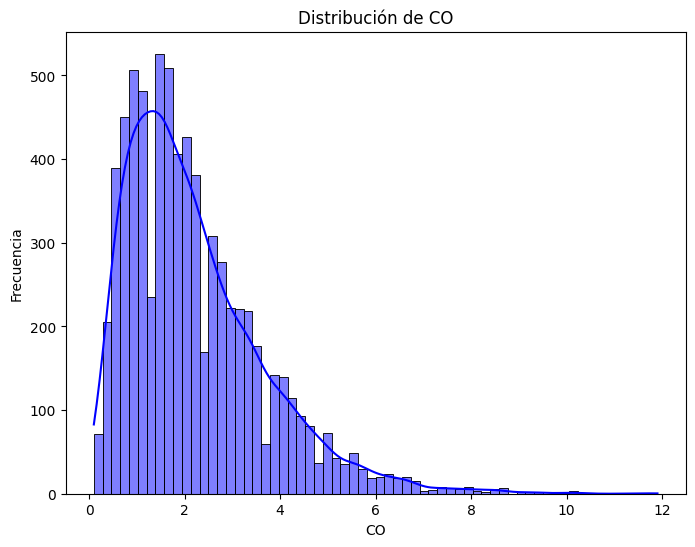

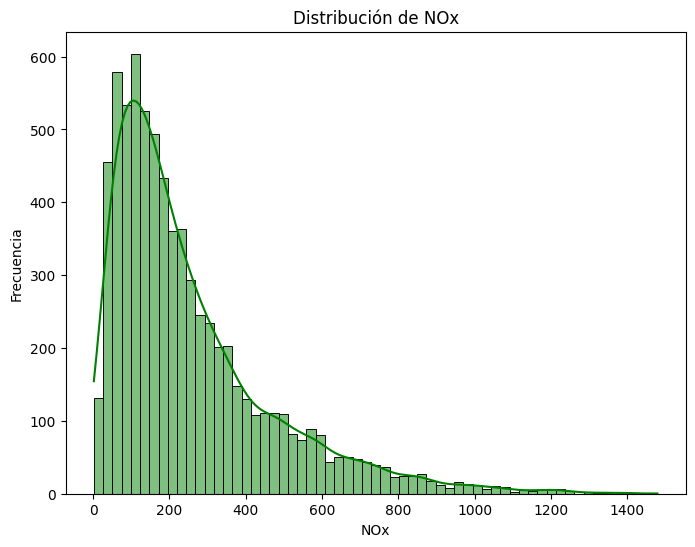

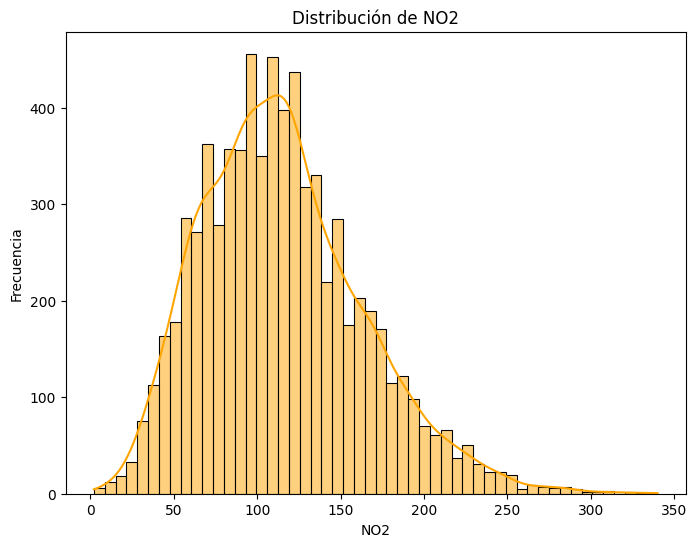

In [ ]:
#distribucion especial
# Visualizar la distribución de 'CO' utilizando un histograma
plt.figure(figsize=(8, 6))
sns.histplot(data_limpiada['CO(GT)'], kde=True, color='blue')
plt.title('Distribución de CO')
plt.xlabel('CO')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar la distribución de 'NOx' utilizando un histograma
plt.figure(figsize=(8, 6))
sns.histplot(data_limpiada['NOx(GT)'], kde=True, color='green')
plt.title('Distribución de NOx')
plt.xlabel('NOx')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar la distribución de 'NO2' utilizando un histograma
plt.figure(figsize=(8, 6))
sns.histplot(data_limpiada['NO2(GT)'], kde=True, color='orange')
plt.title('Distribución de NO2')
plt.xlabel('NO2')
plt.ylabel('Frecuencia')
plt.show()



In [ ]:
#Datos faltantes ?

print("Datos faltantes en CO:", data_limpiada['CO(GT)'].isnull().sum())
print("Datos faltantes en NOx:", data_limpiada['NOx(GT)'].isnull().sum())
print("Datos faltantes en NO2:", data_limpiada['NO2(GT)'].isnull().sum())


Datos faltantes en CO: 0
Datos faltantes en NOx: 0
Datos faltantes en NO2: 0


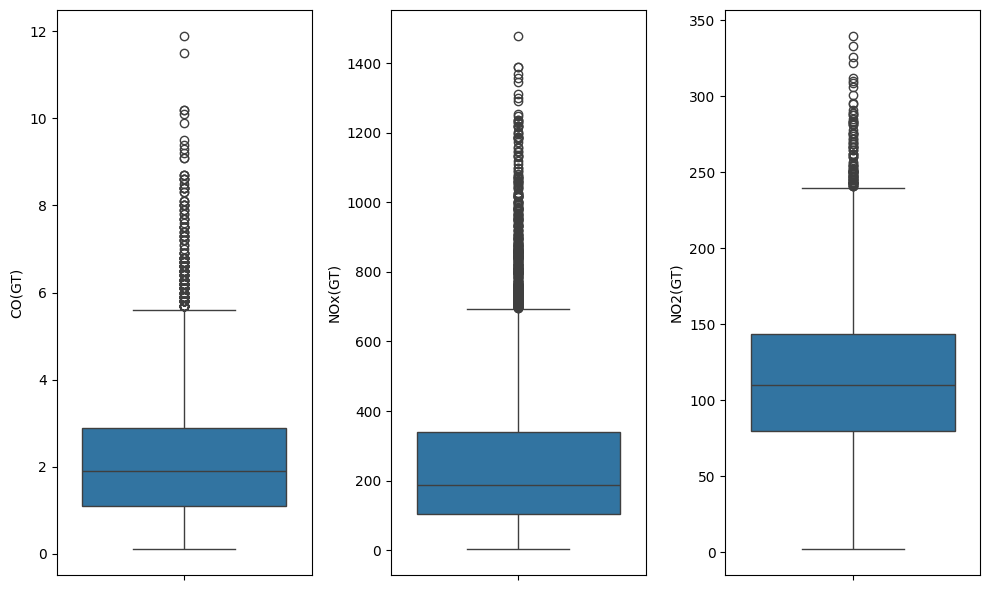

In [ ]:
# Diagramas de caja
plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y=data_limpiada['CO(GT)'])
plt.subplot(1, 3, 2)
sns.boxplot(y=data_limpiada['NOx(GT)'])
plt.subplot(1, 3, 3)
sns.boxplot(y=data_limpiada['NO2(GT)'])
plt.tight_layout()
plt.show()


La visualización se hizo a través de histogramas, donde CO y NOx muestran una distribución asimétrica hacia la derecha, mientras que NO2 tiene una distribución simétrica.\
Se comprobó que no tiene datos faltantes.\
Por medio de diagramas de caja se evidenció que sí tiene algunos datos anómalos fuera de lo esperado, pero son pocos, por lo que no se tomará ninguna acción contra ellos.

In [ ]:
#Aqui hare una depuracion en los datos con el fin de reducir los outliers de los datos.

# Seleccionar las columnas numéricas
data_numeric = data.select_dtypes(include=[np.number])

#eliminar las dos columnas sin datos
data_numeric = data_numeric.iloc[:, :-2]


#solo imputare los datos de la columna 'NMHC(GT)'
data_numeric.drop(columns=['NMHC(GT)'], inplace=True)



In [ ]:
# Eliminar valores negativos para todas las columnas.

#data_limpiada = data[(data['CO(GT)'] >= 0) & (data['NOx(GT)'] >= 0) & (data['NO2(GT)'] >= 0)]
data_numeric_limpiada = data_numeric[(data_numeric['CO(GT)'] >= 0) & (data_numeric['PT08.S1(CO)'] >= 0) & (data_numeric['C6H6(GT)'] >= 0) & (data_numeric['PT08.S2(NMHC)'] >= 0) & (data_numeric['NOx(GT)'] >= 0) & (data_numeric['PT08.S3(NOx)'] >= 0) & (data_numeric['NO2(GT)'] >= 0) & (data_numeric['PT08.S4(NO2)'] >= 0) & (data_numeric['PT08.S5(O3)'] >= 0) & (data_numeric['T'] >= 0) & (data_numeric['RH'] >= 0) & (data_numeric['AH'] >= 0)]


In [ ]:
# calculo de los percentiles
percentile_25=data_numeric_limpiada.quantile(0.25)
percentile_75=data_numeric_limpiada.quantile(0.75)
iqr=percentile_75-percentile_25
#limites del bigote
limite_superior= percentile_75+1.5*iqr
limite_inferior= percentile_25-1.5*iqr

print(limite_superior)

CO(GT)              5.6000
PT08.S1(CO)      1698.0000
C6H6(GT)           29.1500
PT08.S2(NMHC)    1700.0000
NOx(GT)           682.3750
PT08.S3(NOx)     1401.3750
NO2(GT)           236.5000
PT08.S4(NO2)     2395.5000
PT08.S5(O3)      2167.5000
T                  42.4500
RH                102.5500
AH                  2.0897
dtype: float64


(6211, 12)


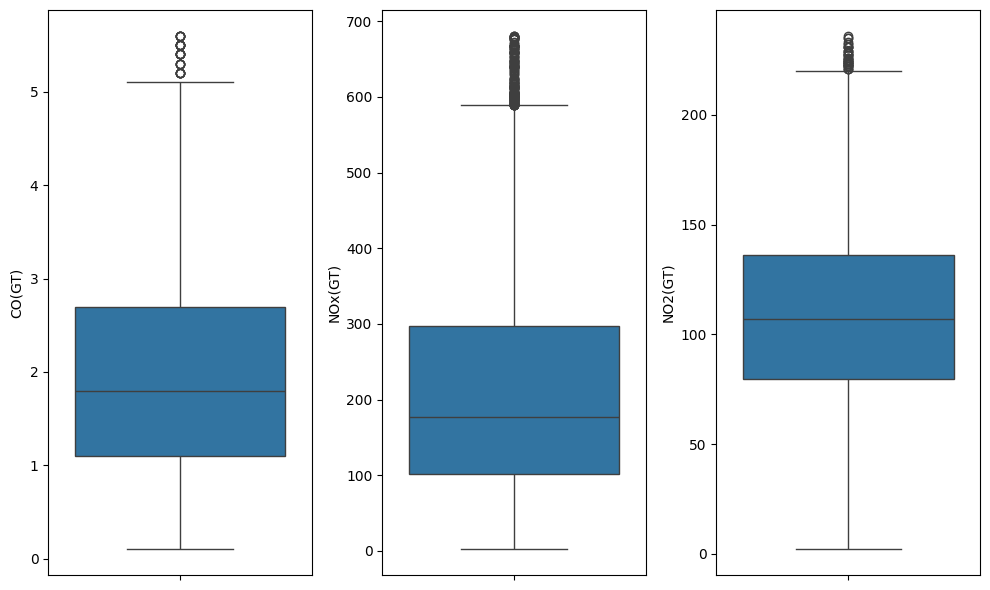

In [ ]:
# Filtrar límites del bigote
data_sin_bigotes = data_numeric_limpiada[~((data_numeric_limpiada < limite_inferior) | (data_numeric_limpiada > limite_superior)).any(axis=1)]

# Imprimir la forma de la base de datos filtrada para verificar cuántas filas quedaron después de la eliminación
print(data_sin_bigotes.shape)
# Diagramas de caja
plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y=data_sin_bigotes['CO(GT)'])
plt.subplot(1, 3, 2)
sns.boxplot(y=data_sin_bigotes['NOx(GT)'])
plt.subplot(1, 3, 3)
sns.boxplot(y=data_sin_bigotes['NO2(GT)'])
plt.tight_layout()
plt.show()


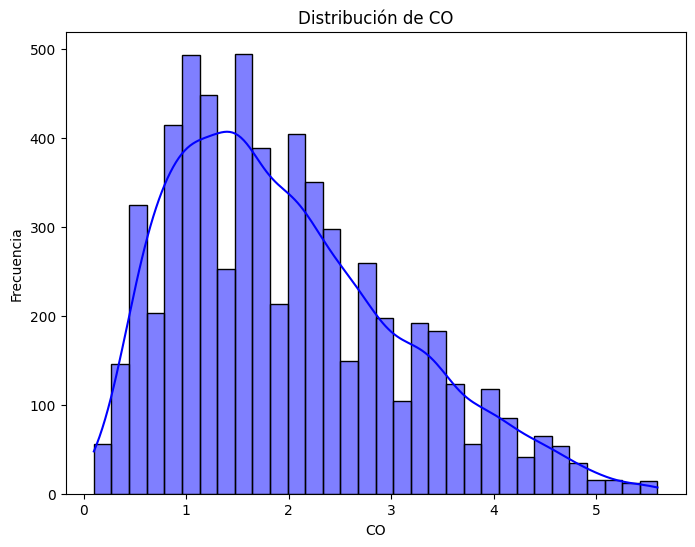

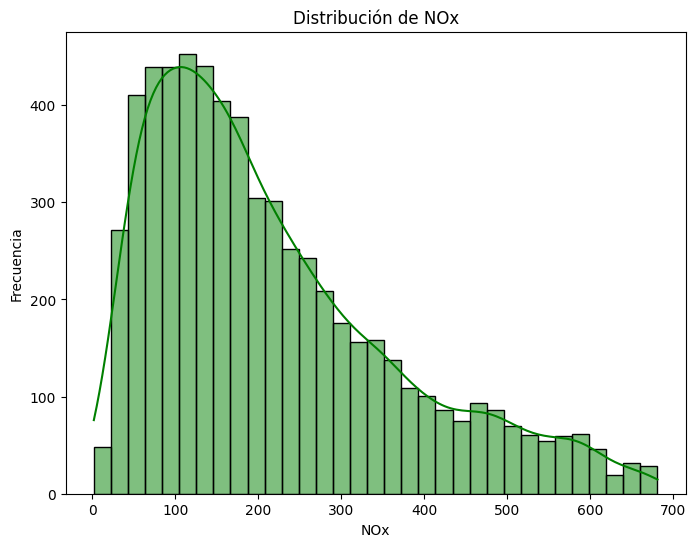

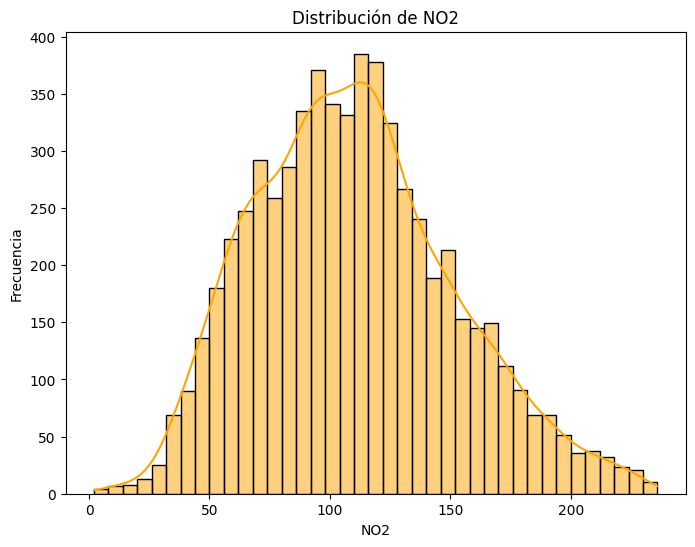

In [ ]:

# Visualizar la distribución de 'CO' utilizando un histograma
plt.figure(figsize=(8, 6))
sns.histplot(data_sin_bigotes['CO(GT)'], kde=True, color='blue')
plt.title('Distribución de CO')
plt.xlabel('CO')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar la distribución de 'NOx' utilizando un histograma
plt.figure(figsize=(8, 6))
sns.histplot(data_sin_bigotes['NOx(GT)'], kde=True, color='green')
plt.title('Distribución de NOx')
plt.xlabel('NOx')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar la distribución de 'NO2' utilizando un histograma
plt.figure(figsize=(8, 6))
sns.histplot(data_sin_bigotes['NO2(GT)'], kde=True, color='orange')
plt.title('Distribución de NO2')
plt.xlabel('NO2')
plt.ylabel('Frecuencia')
plt.show()



In [ ]:
## ¿cómo son las correlaciones entre las variables del dataset?

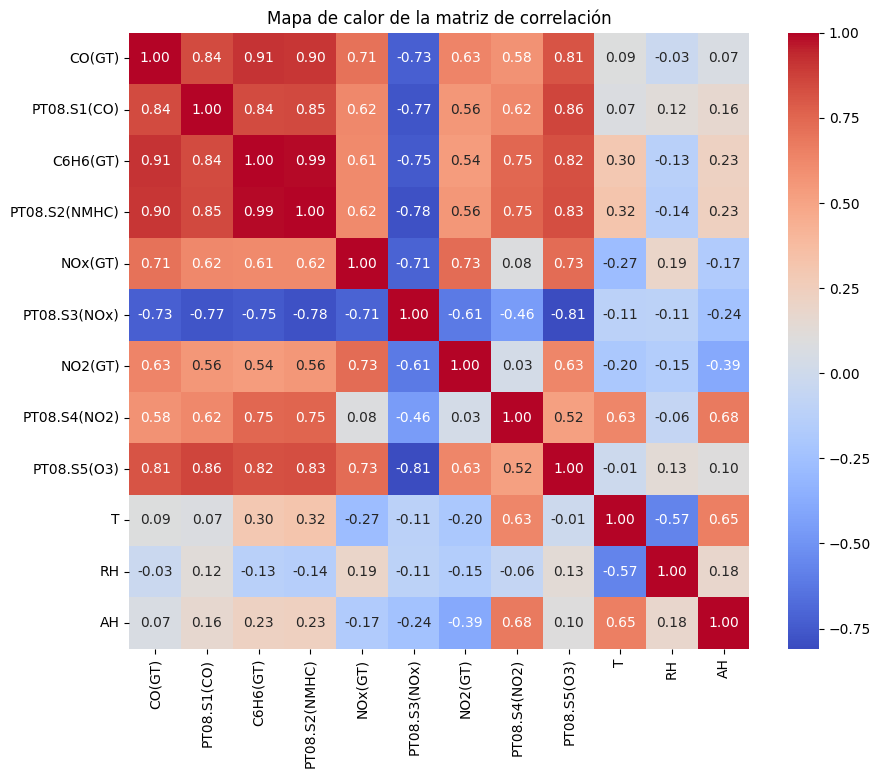

In [ ]:

# Seleccionar columnas y hacer la matrix de correlacion
matriz_correlacion = (data_sin_bigotes.select_dtypes(include=['float64'])).corr()

# tamaño de la figura
plt.figure(figsize=(10, 8))

# Mapa de calor
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")

# Título
plt.title('Mapa de calor de la matriz de correlación')

# Imprimir
plt.show()


_indica aquí tu respuesta_

---
En el mapa de calor se observa todas las correlaciones que existen.


In [ ]:
## ¿qué tres variables son las más correlacionadas con la variable objetivo?

In [ ]:
#from pickle import TRUE

# seleccionar columna 'CO(GT)' y ordenar.
correlaciones_objetivo = matriz_correlacion['CO(GT)'].sort_values(ascending=False)

# Imprimir las tres variables con mas correlacion
print("Las tres variables más correlacionadas con la variable objetivo (CO(GT)) son:")
print(correlaciones_objetivo[1:4])


Las tres variables más correlacionadas con la variable objetivo (CO(GT)) son:
C6H6(GT)         0.908364
PT08.S2(NMHC)    0.901286
PT08.S1(CO)      0.839412
Name: CO(GT), dtype: float64


_indica aquí tu respuesta_

---
Las tres variables más correlacionadas con la variable objetivo (CO(GT)) son:\
C6H6(GT)       =  0.908364\
PT08.S2(NMHC)   = 0.901286\
PT08.S1(CO)      =0.839412


In [ ]:
## ¿existe alguna variable que no tenga correlación?

In [ ]:
# Aplicamos valor absoluto en la columna de nuestra variable objetivo y filtramos si tiene una correlacion menor al 0.1

variables_sin_correlacion = correlaciones_objetivo[correlaciones_objetivo.abs() < 0.1]

# Imprimir las variables sin correlación a la variable objetivo.
print("Variables sin correlación con ninguna otra variable:\n", variables_sin_correlacion)



Variables sin correlación con ninguna otra variable:
 T     0.090533
AH    0.066582
RH   -0.029153
Name: CO(GT), dtype: float64


_indica aquí tu respuesta_

---
Las tres variables más correlacionadas con la variable objetivo (CO(GT)) son:\
 T =    0.090533\
AH  =  0.066582\
RH   =-0.029153

In [ ]:
# En base al EDA realizado, ¿qué suposiciones se pueden hacer sobre los datos?
#¿qué conclusiones extraes para implementar el modelo predictivo?

_indica aquí tu respuesta_

---
Inicialmente, los datos presentaban varias anomalías, evidenciando valores negativos y nulos. Para garantizar una mayor eficacia, se decidió eliminarlos. Aunque se observaron datos atípicos en los diagramas de caja, su número era reducido, por lo que no se consideró necesario tomar medidas al respecto.

Como se pudo observar en la matriz de correlación, existe una alta correlación entre muchos valores, lo cual podría afectar la precisión de los modelos posteriormente.

Conclusiones:

Previo al entrenamiento de los datos, es necesario llevar a cabo un proceso de preprocesamiento, el cual puede implicar la eliminación de valores atípicos o la imputación de los mismos.





### Regresión

Para llevar a cabo la tarea de regresión deseada se pretender hacer una comparativa de varios modelos. Unos usarán el algortimo de regresión lineal, y otros realizarán la predicción haciendo uso de árboles de decisión.

Para los primeros modelos hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

El algortimo de Regresión Lineal necesita saber cuáles son las variables que va a tener en cuenta para realizar la estimación.

El primero modelo que se debe construir usará una regresión lineal simple. Para ello sigue los siguientes pasos.

Antes de empezar con la implementación de los modelos hace falta realizar una transformación de datos, escalarlos.

In [ ]:
# separar datos de entrenamiento y test


In [ ]:
#dividir data set en conjunto de entrenamiento y test


from sklearn.model_selection import train_test_split
# Eliminar la variable a predecir
X = data_sin_bigotes.drop(columns=['CO(GT)'])
# Seleccionar solo la variable a predecir
y = data_sin_bigotes['CO(GT)']


X_entre,X_test,y_entre,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
#print(X_entre,X_entre,)


In [ ]:
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Escalar las características de entrenamiento
X_entre_escalado = DataFrame(scaler.fit_transform(X_entre), columns=X_entre.columns)

# Escalar las características de prueba
X_test_escalado = DataFrame(scaler.transform(X_test), columns=X_test.columns)



In [ ]:
# escoger la variable que a partir del EDA realizado, consideres que mejor va a realizar la predicción

indica tu respuesta

---
Escogi la que tubo mayor correlacion: C6H6(GT) = 0.908364


In [ ]:
# entrena el modelo con los datos de entrenamiento

In [ ]:
from sklearn.linear_model import LinearRegression


modelo_regresion_lineal = LinearRegression()

# Entrenar el modelo
modelo_regresion_lineal.fit(X_entre[['C6H6(GT)']], y_entre)



LinearRegression()

In [ ]:
# ¿cuáles son los valores aprendidos por el modelo para los parámetros?

indica tu respuesta

---
son:
- X_entre[['C6H6(GT)']]
- y_entre

In [ ]:
# Obtener los valores aprendidos para los parámetros
coeficientes = modelo_regresion_lineal.coef_

# Imprimir
print("Valores de los coeficientes:", coeficientes)


Valores de los coeficientes: [0.17002467]


_indica aquí tu respuesta_

---
Valores de los coeficientes: [0.17002467]

In [ ]:
# realiza las predicciones para el conjunto de datos de test

<function matplotlib.pyplot.show(close=None, block=None)>

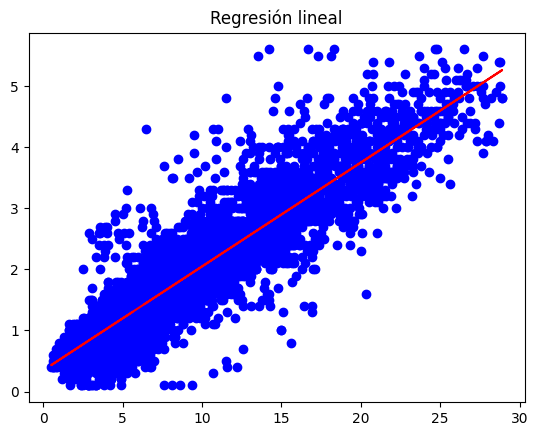

In [ ]:
#predecir lo de test
y_prede=modelo_regresion_lineal.predict(X_entre[['C6H6(GT)']])
#visualizar
plt.scatter(X_entre[['C6H6(GT)']],y_entre,color="blue")
plt.plot(X_entre[['C6H6(GT)']],modelo_regresion_lineal.predict(X_entre[['C6H6(GT)']]),color="red")
plt.title("Regresión lineal")
plt.show

_indica aquí tu respuesta_

In [ ]:
# ¿Qué error tiene el modelo? Explícalo.

In [ ]:
# Ahora es necesario evaluar el modelo. ¿Qué métrica es mejor utilizar en este caso?


from sklearn.metrics import mean_squared_error, r2_score

# MSE
mse = mean_squared_error(y_entre, y_prede)
print("Error cuadrático medio (MSE):", mse)

# Calcular (R^2)
r2 = r2_score(y_entre, y_prede)
print("Coeficiente de determinación (R^2):", r2)


Error cuadrático medio (MSE): 0.2142446065033567
Coeficiente de determinación (R^2): 0.8231466115529428


En un principio, se seleccionó la variable "NOx(GT)" para la regresión lineal, ya que mostraba la mayor correlación antes de depurar los datos (eliminación de negativos, NaNs y outliers del diagrama de cajas). Se obtuvo un resultado inicial de:

Error cuadrático medio (MSE): 0.6050638280319369
Coeficiente de determinación (R^2): 0.5005354395583395
Tras depurar los datos, se construyó la matriz de correlación y se determinó que la mejor opción era 'C6H6(GT)'. Después de realizar la regresión lineal con esta variable, se observó una mejora significativa en los resultados:

Error cuadrático medio (MSE): 0.2142446065033567
Coeficiente de determinación (R^2): 0.8231466115529428
El MSE representa el promedio de los errores al cuadrado entre los valores predichos y los reales. Un MSE de 0.214 es relativamente bajo, lo que indica un modelo con un nivel aceptable de precisión en las predicciones.

Por otro lado, el coeficiente de determinación (R^2) indica la proporción de la varianza que es predecible a partir de las variables independientes. Un valor de R^2 de 0.82 es considerablemente alto, lo que significa que el 82% de la variabilidad de la variable objetivo se explica por el modelo.

In [ ]:
---

Ahora debes entrenar un segundo modelo que haga uso de una regresión lineal múltiple con todas las variables del dataset. Después de entrenar, realiza las predicciones para este segundo modelo.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Seleccionar las variables predictoras
X = data_sin_bigotes.drop(columns=['CO(GT)'])

# La variable objetivo
y = data_sin_bigotes['CO(GT)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


modelo_regresion_multiple = LinearRegression()
modelo_regresion_multiple.fit(X_train, y_train)

#pruebas
predicciones = modelo_regresion_multiple.predict(X_test)




Error cuadrático medio (MSE): 0.16117218890252405
Coeficiente de determinación (R^2): 0.864134311862398


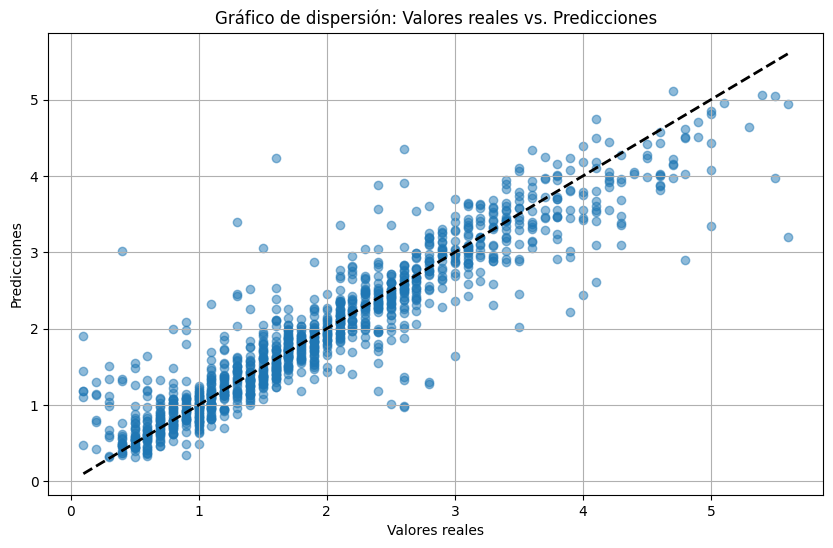

In [ ]:
# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicciones, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Línea de referencia (predicción perfecta)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Gráfico de dispersión: Valores reales vs. Predicciones')
plt.grid(True)
plt.show()

In [ ]:
# Calcular el error cuadrático medio (MSE) y el coeficiente de determinación (R^2)
mse = mean_squared_error(y_test, predicciones)
r2 = r2_score(y_test, predicciones)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)

Error cuadrático medio (MSE): 0.16117218890252405
Coeficiente de determinación (R^2): 0.864134311862398


¿Qué error tiene este modelo?¿Es mejor o peor que el anterior?

_indica aquí tu respuesta_

---
En este modelo de regresion lineal se consiguio un MSE mas bajo y un R^2 mas alto lo que indica un mejoria con respecto al modelo de regresion lineal simple.Es mejor en terminso de precicion de prediccion.

#### Regresión con árboles de decisión

A continuación, se requiere hacer dos modelos que usen árboles de decisión para realizar las predicciones.

Para los árboles de decisión, al ser una tarea de regresión, hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

El algortimo de DTRegressor necesitar ajustar una serie de hiperparámetros para realizar las predicciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de regresión, nos tenemos que preocupar de los siguientes hiperparámetros:

* criterion
* splitter
* max_depth
* min_samples_split
* min_samples_leaf
* max_features



Indica qué son cada uno de estos hiperparámetros



**Criterion**: Se utiliza para medir la calidad de una división. Los valores utilizados son "mse" (error cuadrático medio) y "mae" (error absoluto medio).

**Splitter**: Se utiliza para elegir la división en cada nodo. Se puede elegir entre "best" y "random". "Best" elige la mejor división posible, mientras que "random" elige la división al azar.

**Max_depth**: Es la profundidad máxima del árbol de decisión.

**Min_samples_split**: Indica el número mínimo de muestras necesarias para dividir un nodo interno.

**Min_samples_leaf**: Indica el número mínimo de muestras necesarias para que un nodo sea una hoja (nodo terminal).

**Max_features**: Es el número máximo de características que se deben considerar al buscar la mejor división.

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro min_impurity_decrease

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

_indica aquí tu respuesta_

---
**Min_impurity_decrease**: Indica cual es la cantidad minima de reduccion de impureza para la division de un nodo del arbol. Esto se usa para reducir la complejidad del modelo para una mejor adaptacion a los datos de entrenamiento.

Entrena un modelo de árboles de decisión donde, el criterio para realizar las particiones sea _poisson_, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error
from sklearn.model_selection import train_test_split


X = data_sin_bigotes.drop(columns=['CO(GT)'])
y = data_sin_bigotes['CO(GT)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo de árbol de decisión
modelo_arbol = DecisionTreeRegressor(criterion='poisson', max_depth=10, min_samples_split=10, min_samples_leaf=2, max_features=None)


modelo_arbol.fit(X_train, y_train)

y_pred = modelo_arbol.predict(X_test)



Calcula MAE, R2 y RMSLE

In [ ]:

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))

# Imprimir
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)
print("Root Mean Squared Logarithmic Error (RMSLE):", rmsle)


Mean Absolute Error (MAE): 0.2988141987859154
R^2 Score: 0.8386612686361123
Root Mean Squared Logarithmic Error (RMSLE): 0.15655320613046195


¿Existe overfitting? Indica qué debes hacer para comprobar si hay overfitting.

In [ ]:
from sklearn.model_selection import cross_val_score

scores_train = cross_val_score(modelo_arbol, X_train, y_train, cv=5)
scores_test = cross_val_score(modelo_arbol, X_test, y_test, cv=5)


mean_score_train = scores_train.mean()
mean_score_test = scores_test.mean()


print("Mean CV Score (Train):", mean_score_train)
print("Mean CV Score (Test):", mean_score_test)


Mean CV Score (Train): 0.8482856815998228
Mean CV Score (Test): 0.7854783694042347


¿Este modelo es mejor, peor o igual que los de regresión lineal simple y múltiple? Razona tu respuesta.

_indica aquí tu respuesta_


**Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo. ¿Qué modelo obtiene mejores resultados de regresión?

## Investigación

Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.

_introduce aquí la referencia APA del artículo_

título, autores, revista, año de publicación

Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la regresión. Técnicas de regresión empleadas y si realiza alguna adaptación. Principales resultados de la aplicación y de la investigación.

####**Referencia APA del articulo:**

Morantes-Quintana, G. R., Rincón-Polo, G., & Pérez-Santodomingo, N. A. (2019). Modelo de regresión lineal múltiple para estimar concentración de PM1. Revista internacional de contaminación ambiental, 35(1), 179-194.
####**Título**\
Modelo de regresión lineal múltiple para estimar concentración de PM1
####**Autores**\
Morantes-Quintana, G. R., Rincón-Polo, G., & Pérez-Santodomingo, N. A.
####**Año de publicación**\
2019



